In [1]:
%pylab inline 
%config InlineBackend.figure_formats = ['retina']
import pandas as pd
import seaborn as sns
sns.set()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


LOAD THE DATA , EXAMINE AND EXPLORE 

In [2]:
# LOAD IN THE AMES HOUSING DATA
datafile = "Ames_Housing_Data.tsv"
df = pd.read_csv(datafile, sep='\t')

In [3]:
# EXAMINE THE COLUMNS , LOOK AT MISSING DATA
df.info

<bound method DataFrame.info of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Al

<AxesSubplot:>

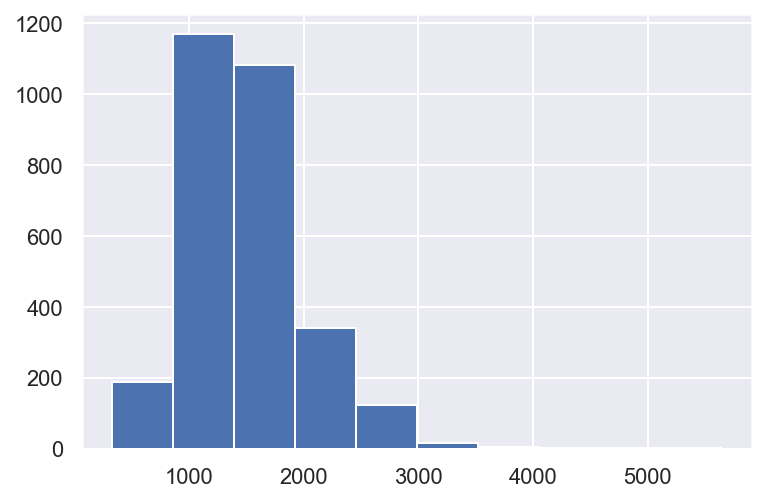

In [4]:
df ['Gr Liv Area'].hist()# WE MAKE THIS HISTOGRAM TO FIND THE OUTLIERS IN THIS DATASET 

In [5]:
# THIS IS RECOMMENDED BY THE DATASET AUTHOR TO REMOVE A FEW OUTLIERS
df = df.loc[df['Gr Liv Area'] <= 4000 , :]
print("number of rows in the data" , df.shape[0])
print("number of columns in the data" , df.shape[1])
data = df.copy()# KEEP A COPY OF OUR ORIGNIAL DATA


number of rows in the data 2925
number of columns in the data 82


In [6]:
# A QUICK LOOK AT THE DATA 
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
# DROPPING COLUMNS FOR WHICH EVERY VALUE IS UNIQUE 
# WILL NOT ADD ANY VALUE TO OUR EVENTUAL MODEL
df.drop(['PID','Order'], axis=1 , inplace = True)

C:\Users\arjun\AppData\Local\Temp\ipykernel_17960\390367163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['PID','Order'], axis=1 , inplace = True)


LOG TRANSFORMING SKEW VARIABLES

In [8]:
df.select_dtypes('number').columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [9]:
#CREAT A LIST OF FLOAT COLUMNS TO CHECK FOR SKEWING 
num_cols = df.select_dtypes('number').columns
skew_limit = 0.75 #DEFINE A LIMIT ABOVE WHICH WE WILL LOG TRANSFORM
skew_vals = df.skew()

C:\Users\arjun\AppData\Local\Temp\ipykernel_17960\3971804042.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_vals = df.skew()


In [10]:
skew_vals # REMEBER ZERO BEING NO SKEW , A POSITIVE NUMBER BEING A RIGHT SKEW , A NEGATIVE NUMBER BEING LEFT SKEW 
# IT TELLS THAT HOW MUCH IS YOUR DATA IS SKEWED 

MS SubClass         1.356549
Lot Frontage        1.111071
Lot Area           13.200004
Overall Qual        0.171657
Overall Cond        0.572769
Year Built         -0.602475
Year Remod/Add     -0.449567
Mas Vnr Area        2.565458
BsmtFin SF 1        0.821985
BsmtFin SF 2        4.135900
Bsmt Unf SF         0.925021
Total Bsmt SF       0.399079
1st Flr SF          0.942615
2nd Flr SF          0.847517
Low Qual Fin SF    12.107629
Gr Liv Area         0.878879
Bsmt Full Bath      0.615553
Bsmt Half Bath      3.965970
Full Bath           0.164954
Half Bath           0.702966
Bedroom AbvGr       0.306912
Kitchen AbvGr       4.309573
TotRms AbvGrd       0.704992
Fireplaces          0.732312
Garage Yr Blt      -0.382039
Garage Cars        -0.219734
Garage Area         0.213681
Wood Deck SF        1.848286
Open Porch SF       2.495162
Enclosed Porch      4.010586
3Ssn Porch         11.393854
Screen Porch        3.953495
Pool Area          18.743766
Misc Val           22.225015
Mo Sold       

In [11]:
# SHOWING THE SKEWED COLUMNS 
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending=False)

skew_cols

Misc Val           22.225015
Pool Area          18.743766
Lot Area           13.200004
Low Qual Fin SF    12.107629
3Ssn Porch         11.393854
Kitchen AbvGr       4.309573
BsmtFin SF 2        4.135900
Enclosed Porch      4.010586
Bsmt Half Bath      3.965970
Screen Porch        3.953495
Mas Vnr Area        2.565458
Open Porch SF       2.495162
Wood Deck SF        1.848286
SalePrice           1.591072
MS SubClass         1.356549
Lot Frontage        1.111071
1st Flr SF          0.942615
Bsmt Unf SF         0.925021
Gr Liv Area         0.878879
2nd Flr SF          0.847517
BsmtFin SF 1        0.821985
dtype: float64

Text(0.5, 0.98, 'Field"SalePrice"')

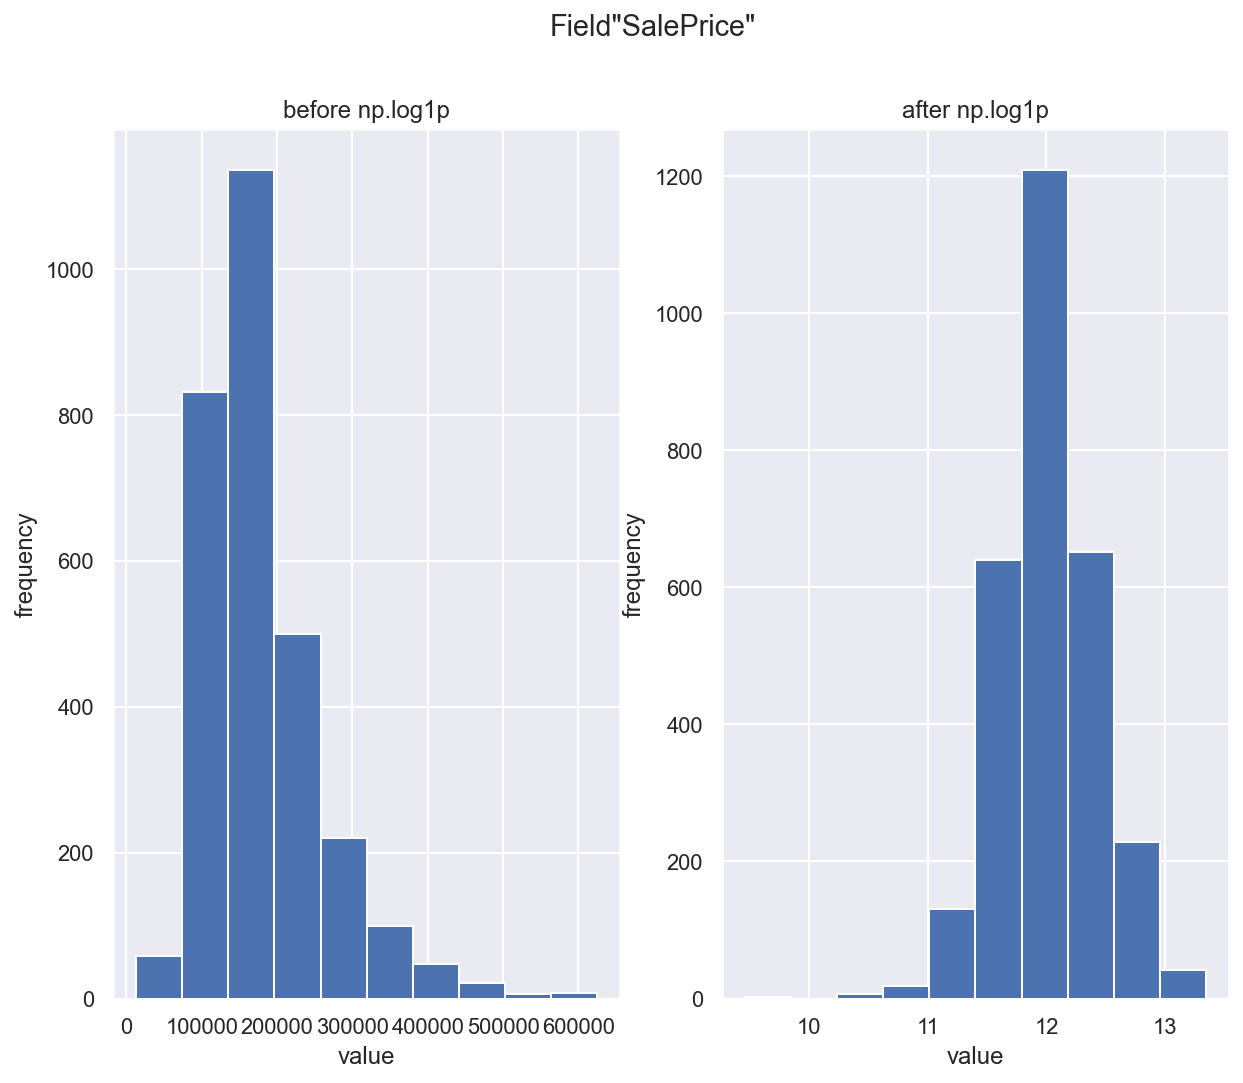

In [12]:
# (WE GOING TO USE PLT.SUBPLOTS.)
# (NOW PLT.SUBPLOTS IS GOING TO ALLOW YOU TO GRAPH TWO AXIS IN ONE FIGURE.)
# (SO THE AXIS ARE GOING TO BE THOSE BOUNDING BOXES, SO WE ARE GOING TO HAVE TWO BOUNDING BOXES IN ONE FIGURE.)

# LETS LOOK AT WHAT HAPPENS TO ONE OF THESE FEATURES , WHEN WE APPLY NP.LOG1P VISUALLY.
# CHOOSE A FIELD
from dataclasses import Field
from turtle import title
import numpy as np
import matplotlib.pyplot as plt
field = 'SalePrice'


# CREAT TWO 'SUBPLOT' AND A 'FIGURE' USING MATPLOTLIB
fig,(ax_before,ax_after)= plt.subplots(1, 2, figsize = (10,8))

# CREAT A HISTOGRAM ON THE 'AX_BEFORE' MATPLOT 
df['SalePrice'].hist(ax=ax_before)

# APPLY A LOG TRANSFORMATION (NUMPY SYNTAX) TO THIS COLUMNS 
df['SalePrice'].apply(np.log1p).hist (ax=ax_after)

# FORMATTING OF TITLES ETC. FOR EACH SUBPLOT
ax_before.set(title='before np.log1p',ylabel='frequency',xlabel='value')
ax_after.set(title='after np.log1p',ylabel='frequency',xlabel='value')
fig.suptitle('Field"{}"'.format('SalePrice'))

<AxesSubplot:>

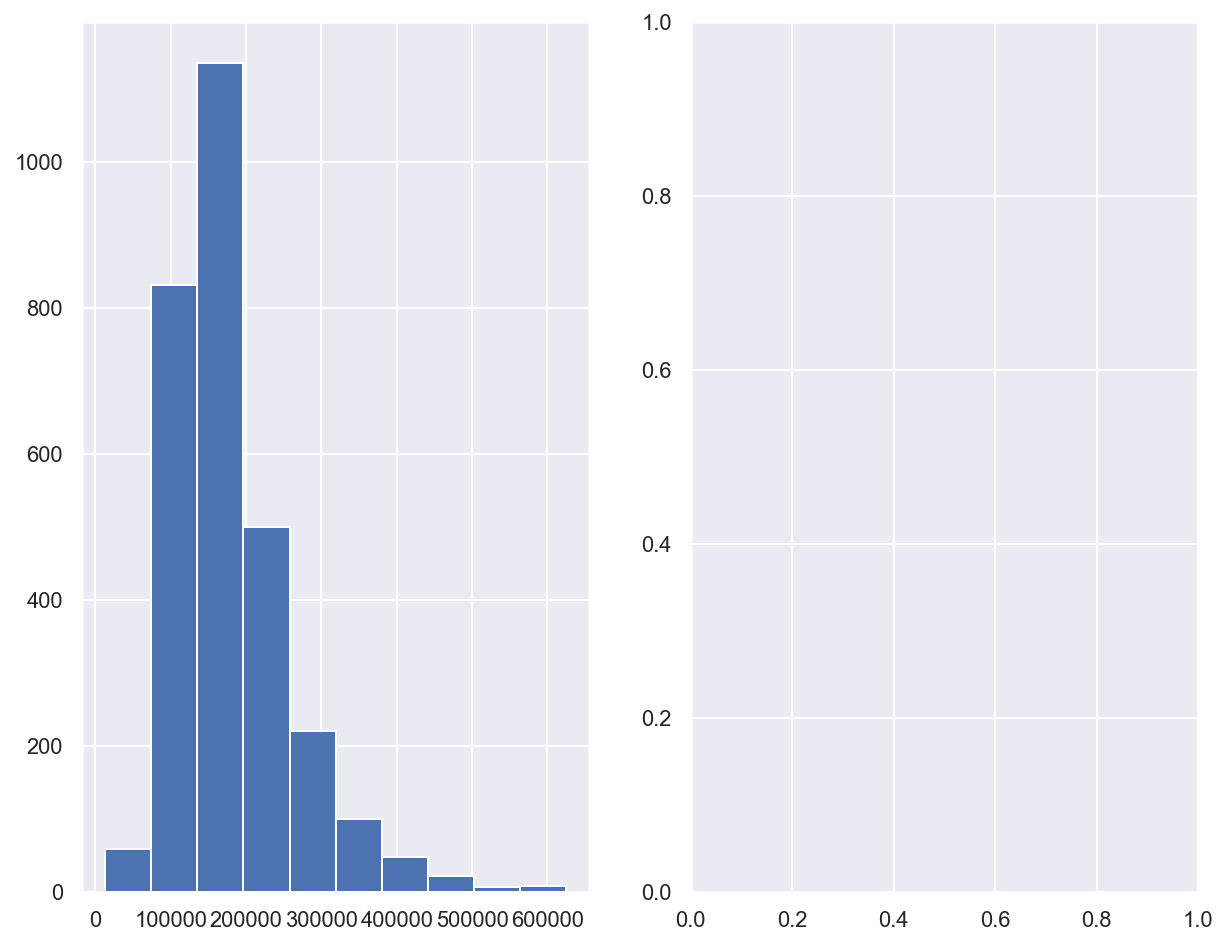

In [13]:
import matplotlib.pyplot as plt
fig,(ax_before , ax_after) = plt.subplots(1, 2, figsize = (10,8))
df['SalePrice'].hist(ax=ax_before)

In [14]:
# PERFORM THE SKEW TRANSFORMATION 
for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

C:\Users\arjun\AppData\Local\Temp\ipykernel_17960\587786921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(np.log1p)


In [15]:
# The isnull() method returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False.
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 82, dtype: int64

In [16]:
# NOW WE CAN LOOK AT SUMMARY STATISTICS OF SUBSET DATA
smaller_df = df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond','Year Built', 'Year Remod/Add','Gr Liv Area','Full Bath','Bedroom AbvGr']]
smaller_df.describe()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,9.090148,6.088205,5.563761,1971.302906,1984.234188,7.258784,1.564786,2.853675
std,0.508309,1.402953,1.112262,30.242474,20.861774,0.320753,0.551386,0.827737
min,7.170888,1.000000,1.000000,1872.000000,1950.000000,5.814131,0.000000,0.000000
25%,8.914492,5.000000,5.000000,1954.000000,1965.000000,7.027315,1.000000,2.000000
50%,9.151545,6.000000,5.000000,1973.000000,1993.000000,7.273786,2.000000,3.000000
75%,9.351493,7.000000,6.000000,2001.000000,2004.000000,7.462215,2.000000,3.000000
max,12.279537,10.000000,9.000000,2010.000000,2010.000000,8.248267,4.000000,8.000000


In [17]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 205.7 KB


In [18]:
# THERE APPEARS TO BE ONE NA IN GARAGE CARS - WE WILL TAKE A SIMPLE APPROACH AND FILL IT WITH 0
smaller_df = smaller_df.fillna(0)

In [19]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 205.7 KB


PAIR PLOT OF FEATURES

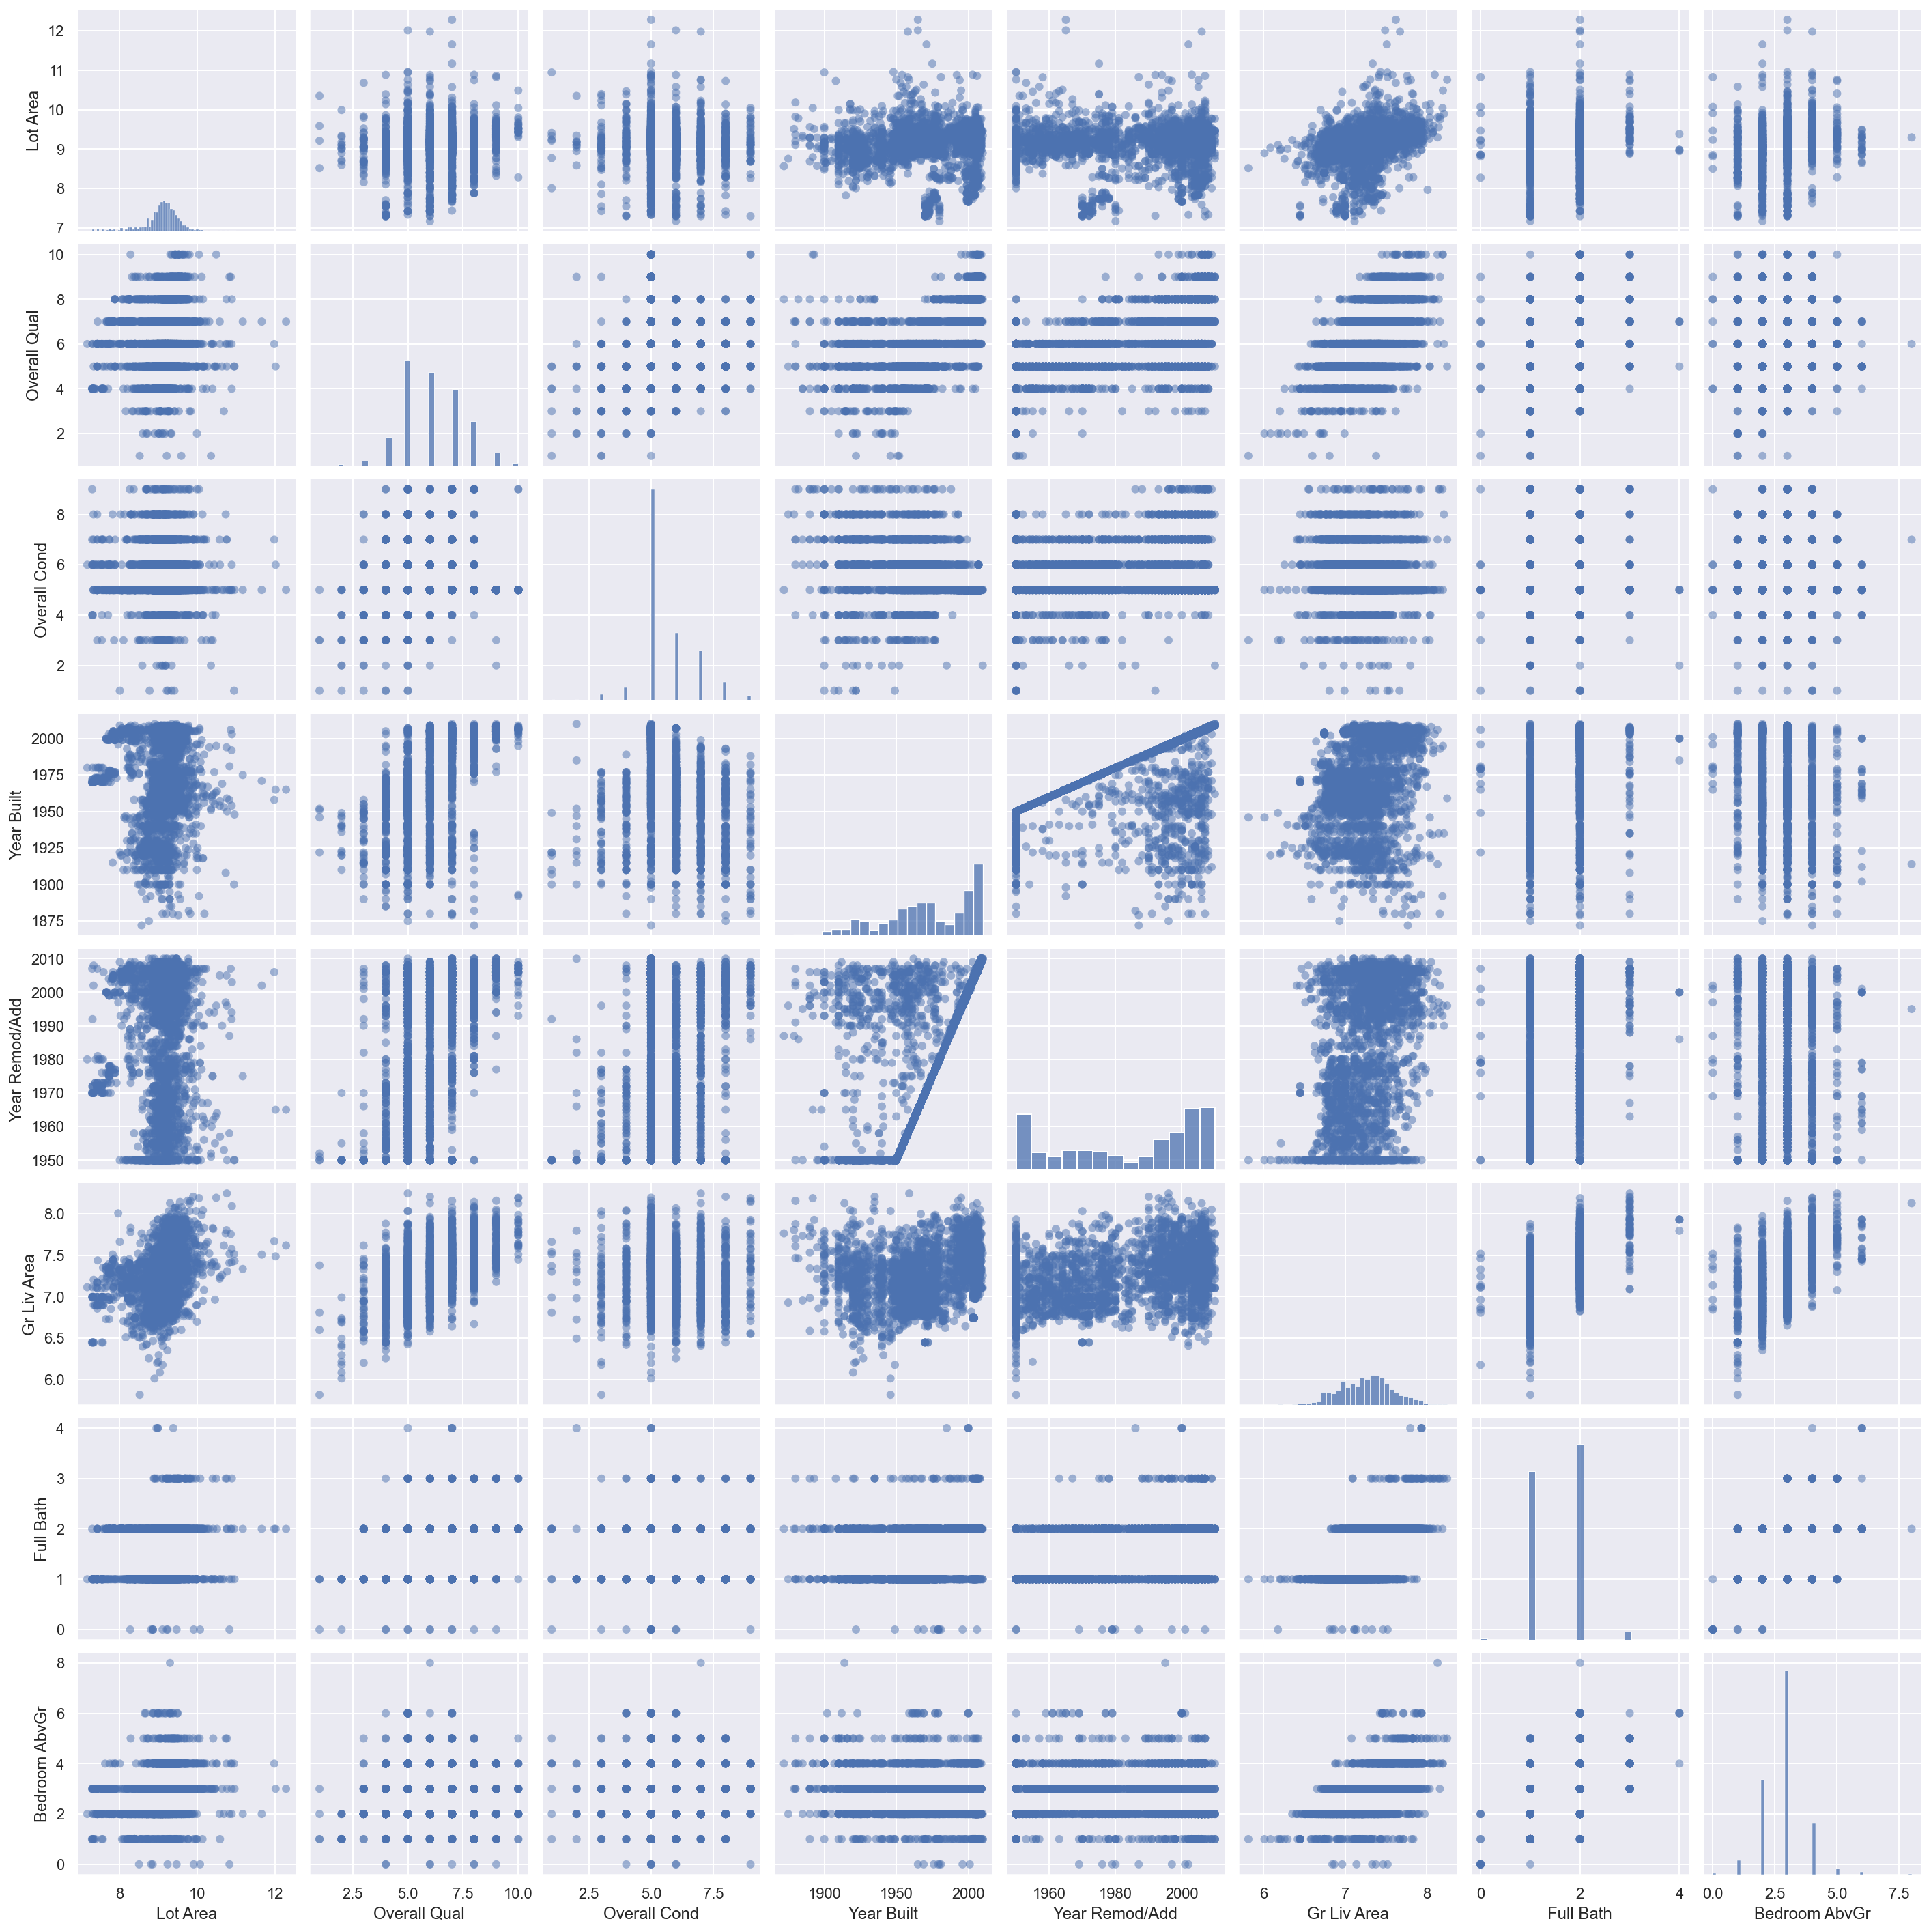

In [20]:
# NOW THAT WE HAVE A NICE , FILTERED DATASET, LETS GENERSTE VISUALS 
sns.pairplot(smaller_df,plot_kws=dict(alpha=.5, edgecolor='None'))

DATA EXPLORATION DISCUSSION :
1. WHAT DO THESE PLOTS TELL US ABOUT THE DISTRIBUTION OF THE TARGET ?
# you can highlight the effect of changing distribution and parameter values , show where target values fall in a distribution , and view the proportions that are associated with important regions.

2. WHAT DO THESE PLOTS TELL US ABOUT THE REALTIONSHIP BETWEEN THE FEATURES AND THE TARGET? DO YOU THINK THAT LINEAR REGRESSION IS WELL - SUITED TO THIS PROBLEM? DO ANY FEATURE TRANSFORMTIONS COME TO MIND ?

In [21]:
# SEPARATE OUR FETURES FROM OUR TARGET 
from tkinter import Y
X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond','Year Built', 'Year Remod/Add','Gr Liv Area','Full Bath','Bedroom AbvGr']]

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 270.2 KB


BASIC FEATURE ENGINEERING : ADDING POLYNOMIAL AND INTERACTION TERMS 

One of the first things that we looked for in the pairplot was evidence about the realtionship between each feature and the target. In certain features like "Lot Area" and _"Gr Liv Qual"_ we notice an upward-curved realtionship rather than a simple linear corespondence. This suggests that we regression as our model.


POLYNOMIAL FEATURES

In [23]:
X2 = X.copy()
X2['0Q2'] = X2['Overall Qual']**2
X2['GLA2'] = X2['Gr Liv Area']**2

AS IT EACH FEATURE IS TRATED AS AN INDEPENDENT QUANTITY .HOWEVER, THERE MAY BE INTERACTION EFFECTS, IN WHICH THE IMPACT OF ONE FEATURE MAY DEPENDENT ON THE CURRENT VALUE OF A DIFFERENT FEATURE.

FEATURE INTERACTION


In [24]:
X3 = X2.copy()
# multiplicative interation 
X3['0Q_x_YB'] = X3['Overall Qual'] * X3['Year Built']
# division interaction 
X3['0Q_/_LA'] = X3['Overall Qual'] / X3['Lot Area']


CATEGORIES AND FEATURES DERIVED FROM CATEGORY AGGREGATES 
Incorporating categorical feature into linear regression models is fairly straightforward: we can create a new feature column for each category value , and fill these columns with 1s and 0s to indicate whch category is present for each row . This method is called dummy variables or one-hot-encoding.

In [25]:
df['House Style'].value_counts()

1Story    1480
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

In [26]:
pd.get_dummies(df)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,3.044522,4.955827,10.366309,6,5,1960,1960,4.727388,6.461468,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,...,0,0,0,1,0,0,0,0,1,0
2,3.044522,4.406719,9.565775,6,6,1958,1958,4.691348,6.828712,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,3.044522,4.543295,9.320181,7,5,1968,1968,0.000000,6.971669,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,4.110874,4.317488,9.534668,5,5,1997,1998,0.000000,6.674561,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,4.394449,3.637586,8.979417,6,6,1984,1984,0.000000,6.709304,0.000000,...,0,0,0,1,0,0,0,0,1,0
2926,3.044522,NaN,9.092232,5,5,1983,1983,0.000000,5.710427,5.783825,...,0,0,0,1,0,0,0,0,1,0
2927,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.000000,...,0,0,0,1,0,0,0,0,1,0
2928,3.044522,4.356709,9.211440,5,5,1974,1975,0.000000,6.977281,4.820282,...,0,0,0,1,0,0,0,0,1,0


In [27]:
pd.get_dummies(df['House Style'], drop_first=True).head()

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0


WE CAN CALL (pd.get _dummies()) ON OUR ENTIRE DATASET QUICKLY GET DATA WITH ALL THE ORIGINAL FEATURES AND DUMMY VARIABLE REPRESENTATION OF ANY CATEGORICAL FEATURES.

In [28]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

FOR THE CATEGORY, LETS MAP THE FEW LEAST-REPRESENTED NEIGHBORHOOD TO AN "OTHER" CATEGORY BEFORE ADDING THE FEATURE TO OUR FEATURE TO OUR FEATURE SET AND RUNNING A NEW BENCHMARK.

In [29]:
df.Neighborhood.value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [30]:
nbh_counts[nbh_counts<=8].index

Index(['Greens', 'GrnHill', 'Landmrk'], dtype='object')

In [31]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)
other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [32]:
X4 = X3.copy()
X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs,"other")

In [33]:
X4.Neighborhood.value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
other       11
Blueste     10
Name: Neighborhood, dtype: int64

GETTING TO FANCIER FEATURES 
Lets close out introduction to feature engineering by considering a more complex type of feature that may work very nicely for certain problems.

Create features that capture where a feature value lies relative to the members of  category it belongs to . In particular , we will calculate deviance of a row's feature value from the mean value of the category that row belongs to. this helps to capture information about a realtive to the category's distribution.

In [34]:
X4.groupby('Neighborhood')['Overall Qual'].transform(lambda x: x.mean)
# (.transform) mean its going to allow us to come up with a value for every single row.


0       <bound method NDFrame._add_numeric_operations....
1       <bound method NDFrame._add_numeric_operations....
2       <bound method NDFrame._add_numeric_operations....
3       <bound method NDFrame._add_numeric_operations....
4       <bound method NDFrame._add_numeric_operations....
                              ...                        
2925    <bound method NDFrame._add_numeric_operations....
2926    <bound method NDFrame._add_numeric_operations....
2927    <bound method NDFrame._add_numeric_operations....
2928    <bound method NDFrame._add_numeric_operations....
2929    <bound method NDFrame._add_numeric_operations....
Name: Overall Qual, Length: 2925, dtype: object

In [35]:
def add_deviance_feature(X, feature, category):
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    # create category means and standard deviation for each observation 
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    # compute stds from category mean for each feature value,
    # add to X new feature
    deviance_feature = (X[feature] - category_mean) / category_std
    X[feature + '_Dev_' + category] = deviance_feature

In [36]:
X5 = X4.copy()
X5['House Style'] = df['House Style']
add_deviance_feature(X5, 'Year Built', 'House Style')
add_deviance_feature(X5, 'Overall Qual', 'Neighborhood')

In [37]:
X5

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,0Q2,GLA2,0Q_x_YB,0Q_/_LA,Neighborhood,House Style,Year Built_Dev_House Style,Overall Qual_Dev_Neighborhood
0,10.366309,6,5,1960,1960,7.412764,1,3,36,54.949070,11760,0.578798,NAmes,1Story,-0.590334,0.857503
1,9.360741,5,6,1961,1961,6.799056,1,2,25,46.227161,9805,0.534146,NAmes,1Story,-0.551186,-0.430205
2,9.565775,6,6,1958,1958,7.192934,1,3,36,51.738303,11748,0.627236,NAmes,1Story,-0.668629,0.857503
3,9.320181,7,5,1968,1968,7.654917,2,3,49,58.597755,13776,0.751058,NAmes,1Story,-0.277154,2.145211
4,9.534668,5,5,1997,1998,7.396335,2,3,25,54.705776,9985,0.524402,Gilbert,2Story,0.545208,-2.101974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,8.979417,6,6,1984,1984,6.911747,1,3,36,47.772251,11904,0.668195,Mitchel,SLvl,0.505068,0.434947
2926,9.092232,5,5,1983,1983,6.805723,1,2,25,46.317859,9915,0.549920,Mitchel,1Story,0.310059,-0.518590
2927,9.253591,5,5,1992,1992,6.878326,1,3,25,47.311375,9960,0.540331,Mitchel,SFoyer,1.096487,-0.518590
2928,9.211440,5,5,1974,1975,7.237059,1,2,25,52.375023,9870,0.542803,Mitchel,1Story,-0.042269,-0.518590


POLYNOMIAL FEATURES IN SCIKIT-LEARN 

Polynomial features are those features created by raising existing features to an exponent. For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2.

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
# Instantiate and provide desired degree:
# note- degree (2) also include intercept , degree(1) terms , and cross-terms

pf = PolynomialFeatures(degree=2)

In [40]:
from pyexpat import features


features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures()

In [41]:
pf.get_feature_names

<bound method PolynomialFeatures.get_feature_names of PolynomialFeatures()>